In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\Monica\\Desktop\\churn of bank customer(classification problem)\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There Is No Missing Values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# drop some columns from dataframe

In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

# Exploring Numerical Columns

8


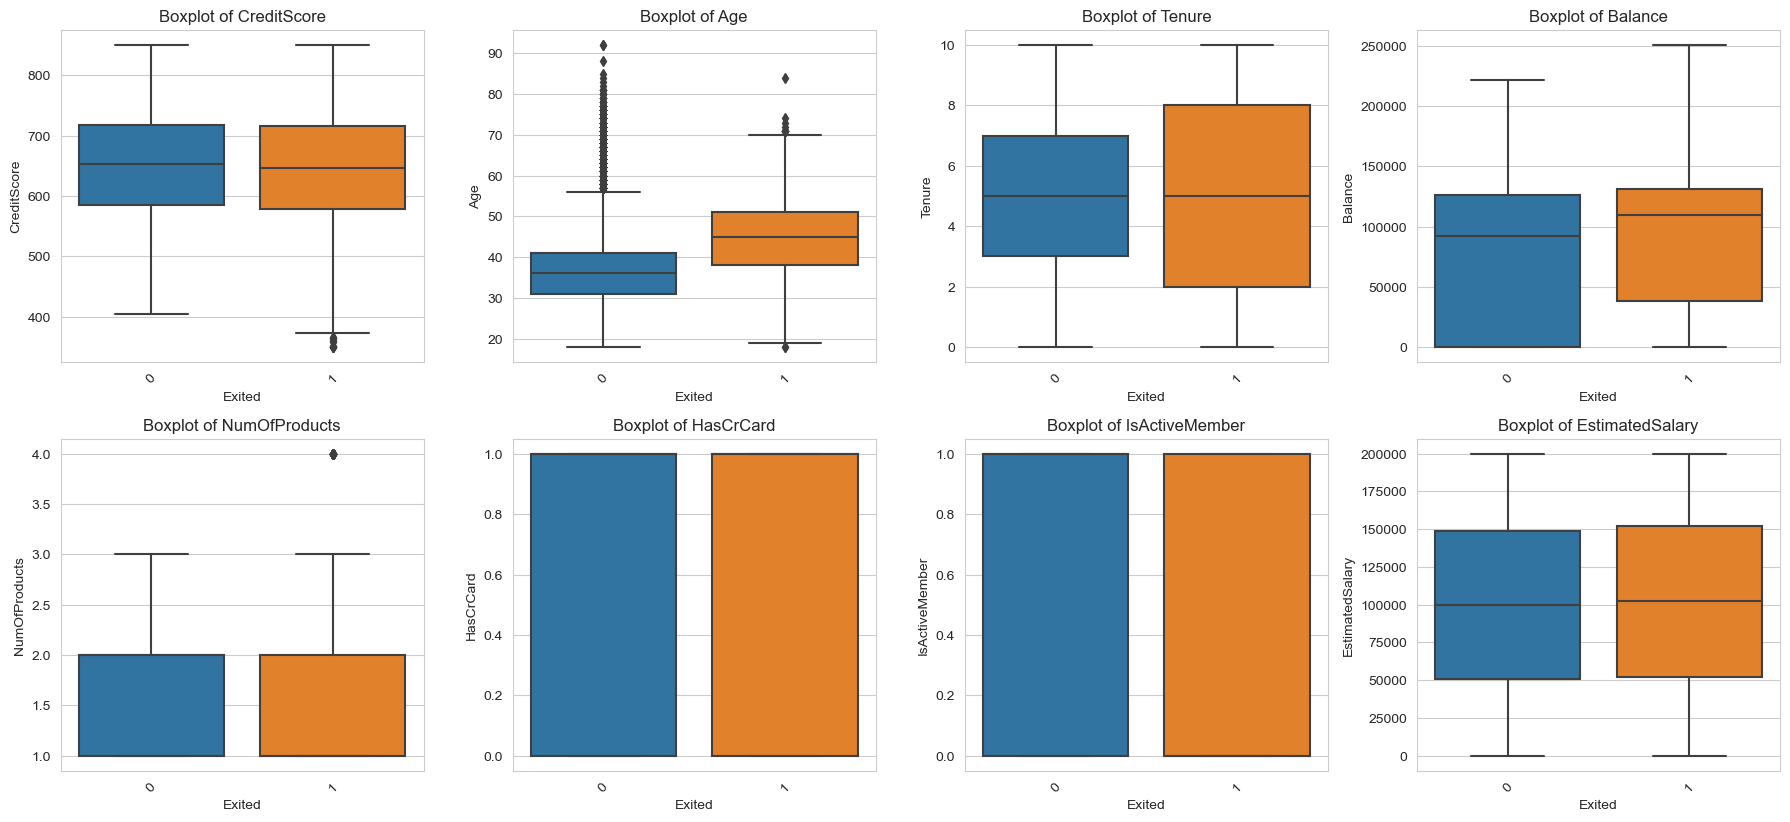

In [8]:
sns.set_style('whitegrid')
num_cols = df.select_dtypes(include=['float64','int64']).columns.drop('Exited')
print(num_cols.nunique())
plt.figure(figsize=(18,12))
for i,col in enumerate(num_cols,1):
    plt.subplot(3,4,i)
    sns.boxplot(y=col, x='Exited' ,data=df)
    plt.title(f"Boxplot of {col}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

# correlation between Exited column and other features

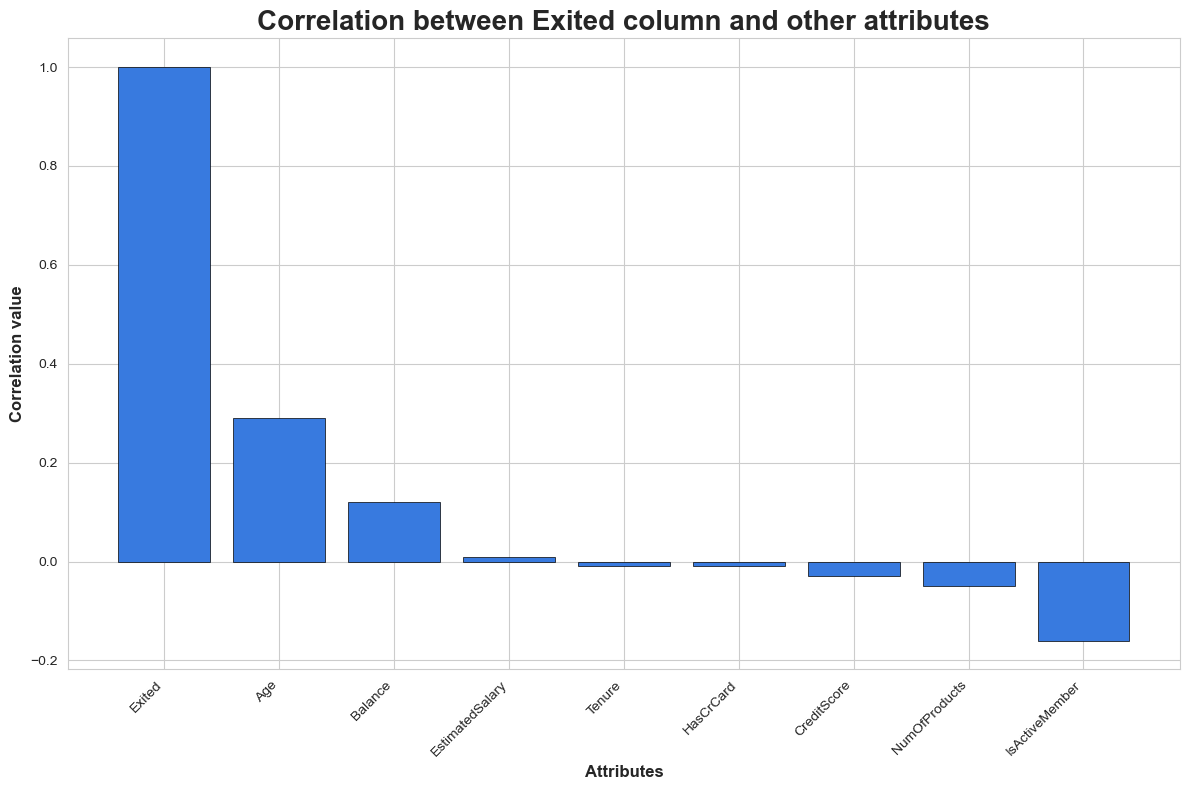

In [9]:
numerical_df = df.select_dtypes(include=['float64','int64'])

correlation_matrix = numerical_df.corr().round(2)

correlation_values = correlation_matrix['Exited'].sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.bar(correlation_values.index, correlation_values.values, color = '#387ADF', edgecolor = 'black', linewidth = 0.5)

plt.title('Correlation between Exited column and other attributes', fontsize=20, fontweight = 'bold')
plt.xlabel('Attributes', fontsize=12, fontweight = 'bold')
plt.ylabel('Correlation value', fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

<Axes: >

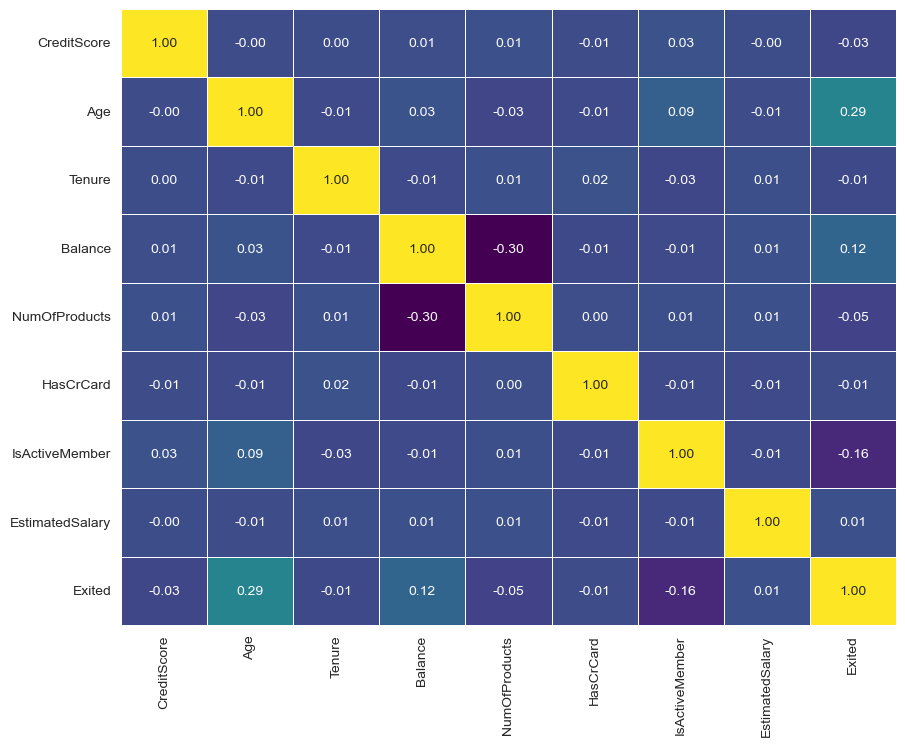

In [10]:
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True, cbar=False , cmap='viridis', fmt=".2f", linecolor="white",linewidths=0.5)

<Axes: xlabel='Exited', ylabel='count'>

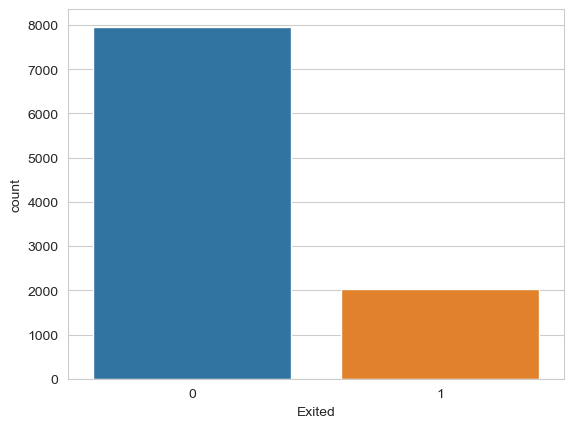

In [11]:
# target column
sns.countplot(x='Exited', data=df)

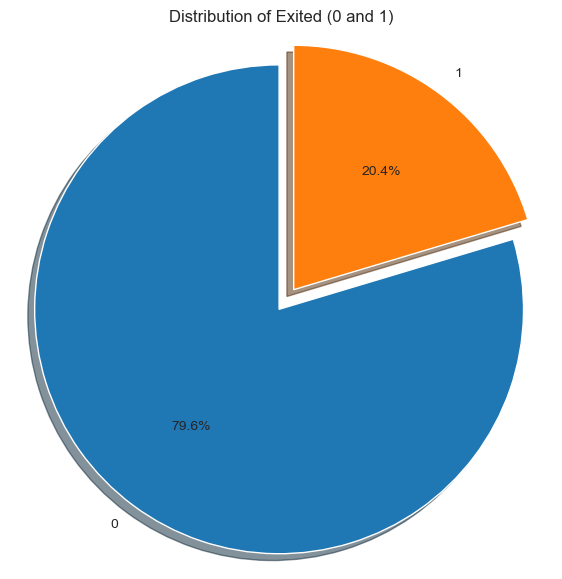

In [12]:
# pie chart 
import matplotlib.pyplot as plt

# محاسبه تعداد مقادیر 0 و 1 در ستون exited
exited_counts = df['Exited'].value_counts()

# رسم نمودار پای چارت
plt.figure(figsize=(7,7))
plt.pie(exited_counts, labels=exited_counts.index, autopct='%1.1f%%', startangle=90 , explode=(0,0.1) , shadow=True)
plt.title('Distribution of Exited (0 and 1)')
plt.axis('equal')  # به منظور دایره ای کردن نمودار
plt.show()


In [13]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


# Exploring Geograghy column

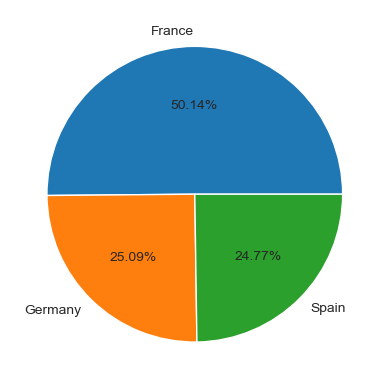

In [14]:
# pie chart
plt.pie(x=df['Geography'].value_counts() , labels =df['Geography'].value_counts().index , autopct='%.2f%%')
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

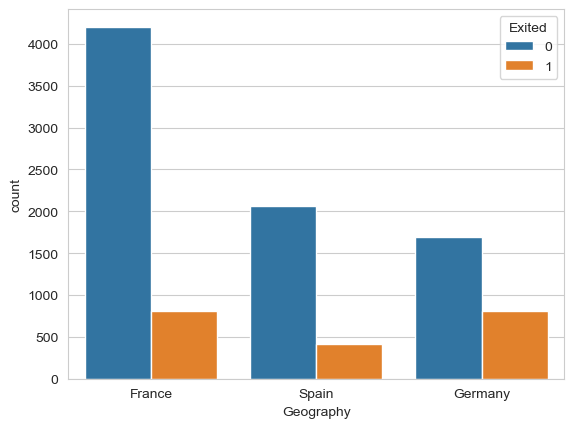

In [15]:
# countplot
sns.countplot(x='Geography', hue='Exited',data=df)

<Axes: xlabel='Exited', ylabel='Geography'>

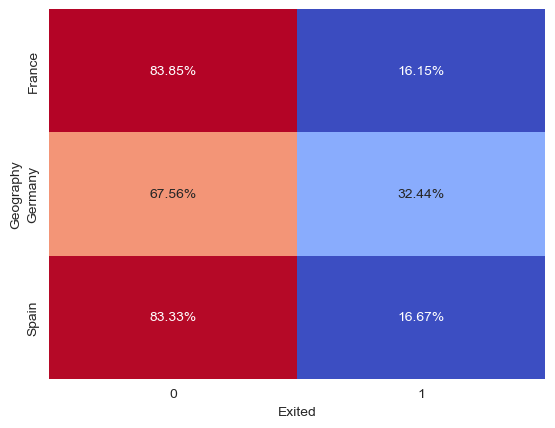

In [16]:
# Heatmap
cross_tab = pd.crosstab(df['Geography'], df['Exited'], normalize='index')
sns.heatmap(cross_tab , annot=True , cbar=False,  cmap = "coolwarm", fmt='0.2%')

In [17]:
df.groupby('Geography')['Exited'].value_counts(normalize=True)*100

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

# Exploring Age column

In [18]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

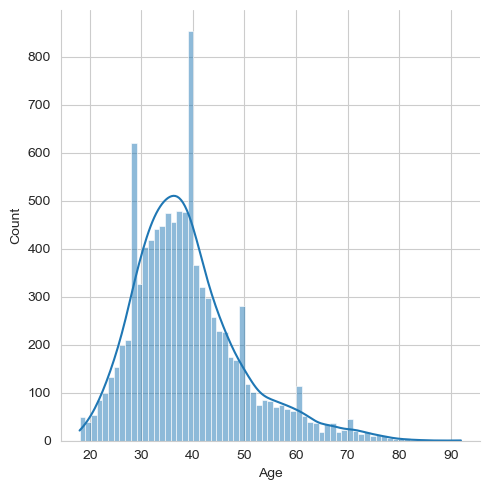

In [19]:
sns.displot(x='Age',data=df , kde=True)

<Axes: xlabel='Exited', ylabel='Age'>

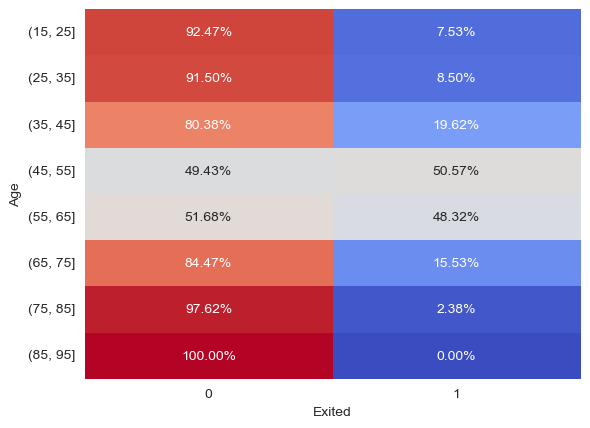

In [20]:
age_group = pd.cut(df['Age'] , bins=range(15,100,10))

cross_tab_age = pd.crosstab(age_group , df['Exited'] , normalize='index' )
sns.heatmap(cross_tab_age ,annot=True, cbar=False, cmap='coolwarm',fmt='.2%')

# Exploring Gender column

In [21]:
df.groupby('Gender')['Exited'].value_counts(normalize=True)*100

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

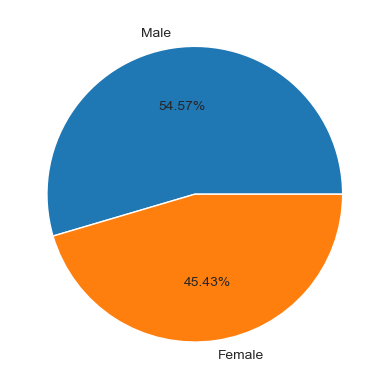

In [22]:
plt.pie(x=df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%0.2f%%')
plt.show()

<Axes: xlabel='Exited', ylabel='Gender'>

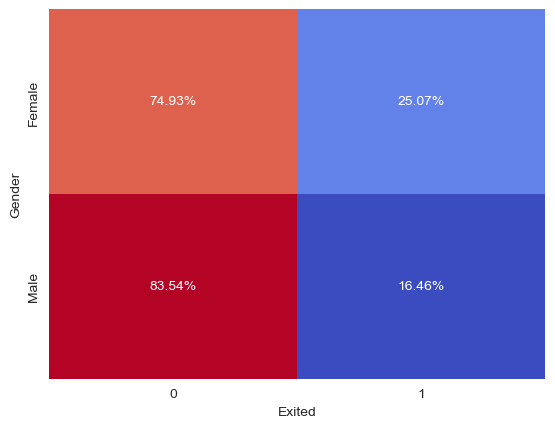

In [23]:
gender_crosstab= pd.crosstab(df['Gender'], df['Exited'] , normalize='index')
sns.heatmap(gender_crosstab ,annot=True , cbar=False, cmap='coolwarm', fmt='0.2%')

# Tenure column

<Axes: xlabel='Tenure', ylabel='Count'>

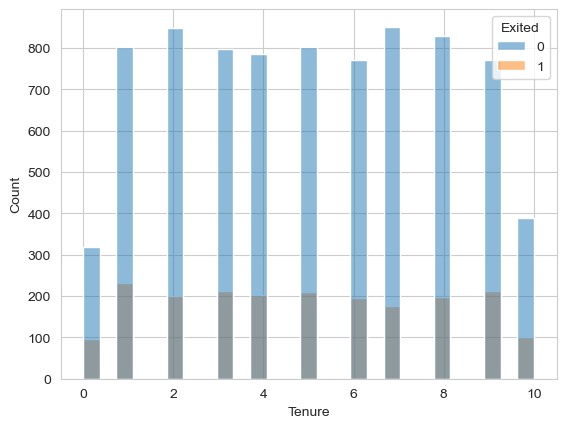

In [24]:
sns.histplot(x='Tenure',data=df , hue='Exited')

# HasCrCard column

In [25]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [26]:
df.groupby('HasCrCard')['Exited'].value_counts(normalize=True)*100

HasCrCard  Exited
0          0         79.185059
           1         20.814941
1          0         79.815734
           1         20.184266
Name: Exited, dtype: float64

# IsActiveMember column

In [27]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [28]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [29]:
df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True)*100

IsActiveMember  Exited
0               0         73.149103
                1         26.850897
1               0         85.730926
                1         14.269074
Name: Exited, dtype: float64

# NumOfProducts column

In [30]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [31]:
df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True)*100

NumOfProducts  Exited
1              0          72.285602
               1          27.714398
2              0          92.418301
               1           7.581699
3              1          82.706767
               0          17.293233
4              1         100.000000
Name: Exited, dtype: float64

# Encoding categorical columns

In [32]:
# get dummies
cat_cols= ['Geography','Gender']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Defining X , y

In [34]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [35]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Scaling data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model

* Logistic Regression
* Random Forest Classifier
* XGBoost
* Gradient Boosting Classifier
* Light GBM
* catBoost
* CART (Decision tree classifier)
* KNN
* Naive bayes(Gaussian)

In [38]:
#!pip install catboost -q

In [39]:
#pip install --upgrade pip

In [40]:
from sklearn.model_selection import cross_val_score , learning_curve , KFold

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score,precision_score, f1_score, recall_score,auc ,roc_curve, ConfusionMatrixDisplay

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [45]:
lr = LogisticRegression(random_state=0)
rf = RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=110, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)
cart = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier(n_neighbors=22)
gnb = GaussianNB()


catboost = CatBoostClassifier(verbose=0 , random_state=0)


lightgbm = LGBMClassifier(verbosity=-1 , random_state=0)




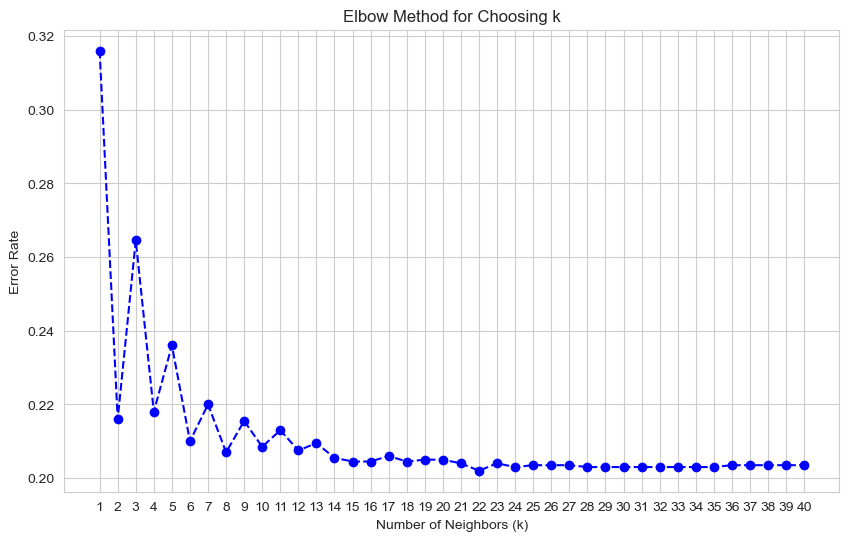

In [43]:
# k تعیین مقدار
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# لیست برای ذخیره خطاها
error_rates = []

# تست مقادیر مختلف k از 1 تا 40
k_range = range(1, 41)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # استفاده از cross_val_score برای محاسبه دقت و خطا
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    
    error_rates.append(np.mean(pred_i != y_test))

# رسم نمودار
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Choosing k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.show()


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# تعیین محدوده k برای جستجو
param_grid = {'n_neighbors': range(1, 40)}

# تعریف مدل KNeighborsClassifier
knn = KNeighborsClassifier()

# تعریف GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# آموزش مدل با کراس ولیدیشن
grid_search.fit(X_train, y_train)

# بهترین مقدار k
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k: {best_k}')

# دقت مدل با بهترین k
best_score = grid_search.best_score_
print(f'Best accuracy: {best_score}')

Best k: 22
Best accuracy: 0.7966249999999999


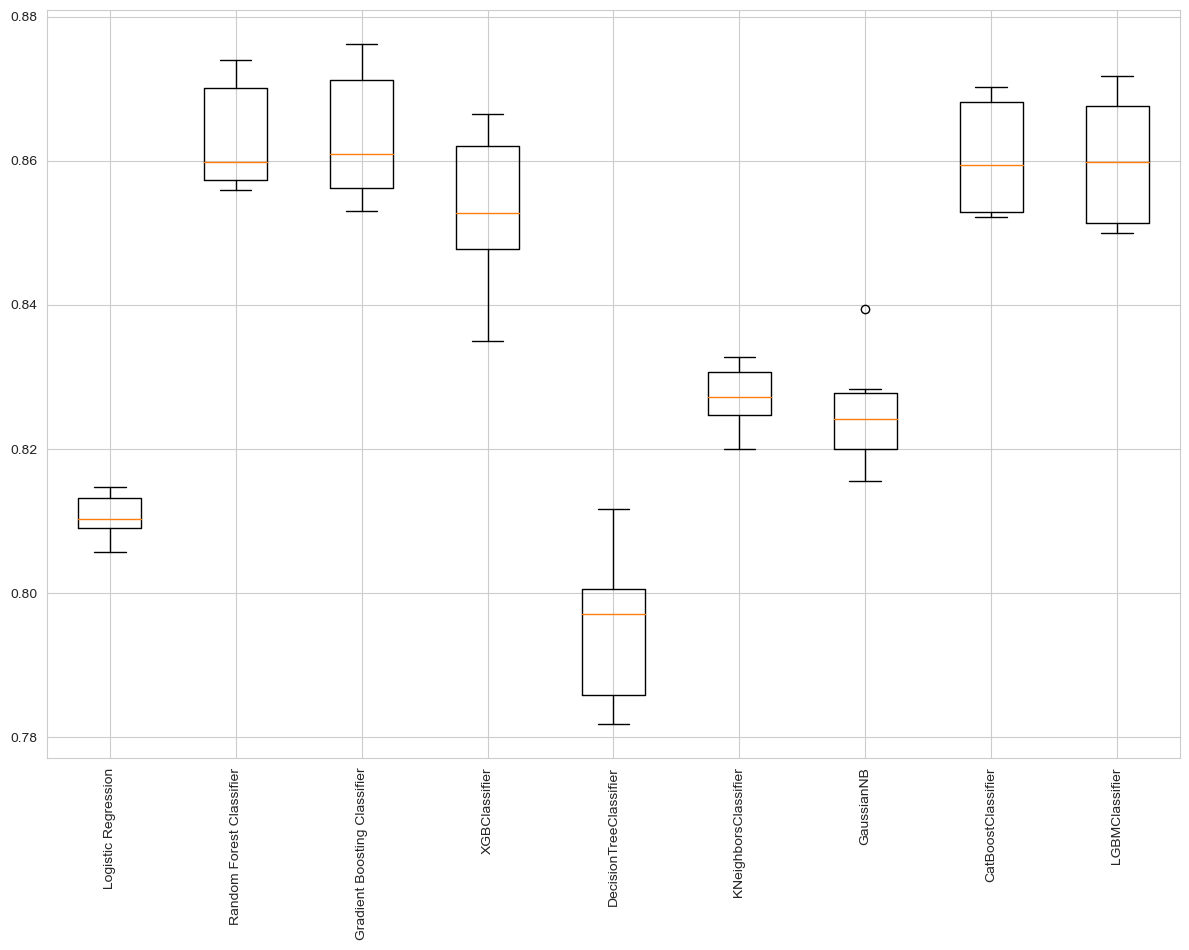

In [46]:
models = {'Logistic Regression':lr , 'Random Forest Classifier':rf ,  'Gradient Boosting Classifier':gbc, 'XGBClassifier':xgboost,
        'DecisionTreeClassifier':cart , 'KNeighborsClassifier':knn , 'GaussianNB':gnb , 'CatBoostClassifier':catboost,
         'LGBMClassifier':lightgbm}


results = []

for model in models.values():
    kf = KFold(n_splits=6 , shuffle=True , random_state=0)
    cv_scores = cross_val_score(model , X_train_scaled , y_train, cv=kf)
    
    avg_accuracy = cv_scores.mean()
    avg_precision = cross_val_score(model , X_train_scaled, y_train, cv=kf, scoring='precision_macro').mean()
    avg_recall = cross_val_score(model , X_train_scaled , y_train , cv=kf, scoring='recall_macro').mean()
    
    
    results.append(cv_scores)


plt.figure(figsize=(12,8))

plt.boxplot(results , labels=models.keys())  
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()



In [47]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    accu_score = accuracy_score(y_test,y_pred)
    print("{} accuracy score : {}".format(name,accu_score))

Logistic Regression accuracy score : 0.808
Random Forest Classifier accuracy score : 0.8655
Gradient Boosting Classifier accuracy score : 0.87
XGBClassifier accuracy score : 0.8515
DecisionTreeClassifier accuracy score : 0.784
KNeighborsClassifier accuracy score : 0.8395
GaussianNB accuracy score : 0.82
CatBoostClassifier accuracy score : 0.87
LGBMClassifier accuracy score : 0.8645


# Tuning Hyperparameters 

# Confusion Matrix & Classification report

Classifier : Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



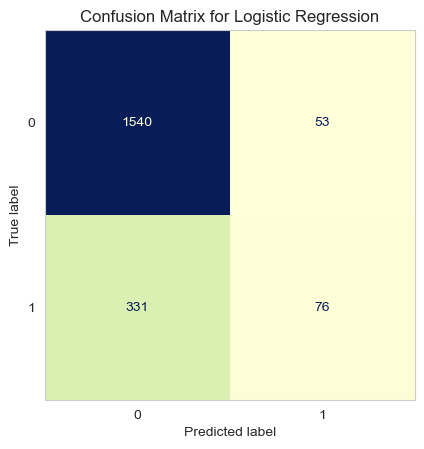

-----------------------------------------
Classifier : Random Forest Classifier
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.46      0.58       407

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



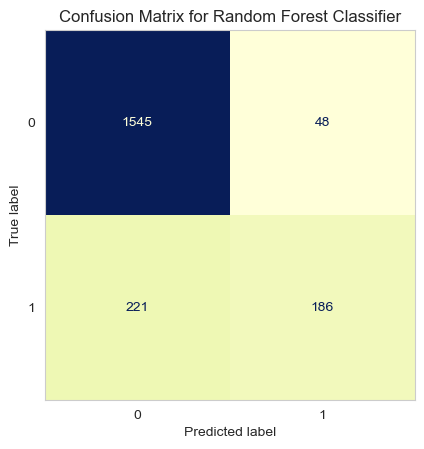

-----------------------------------------
Classifier : Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



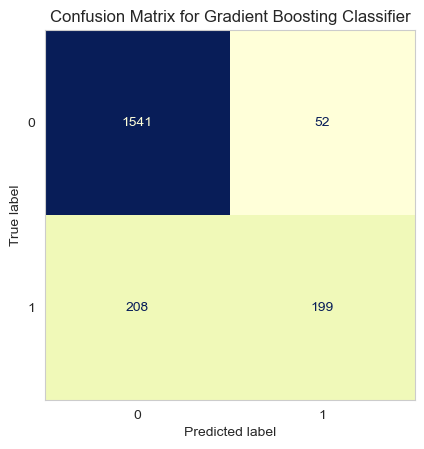

-----------------------------------------
Classifier : XGBClassifier
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



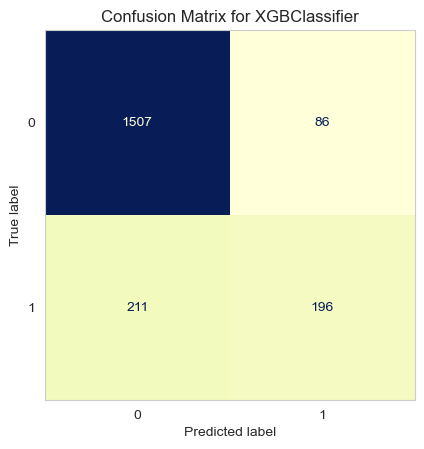

-----------------------------------------
Classifier : DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.47      0.52      0.49       407

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.78      0.79      2000



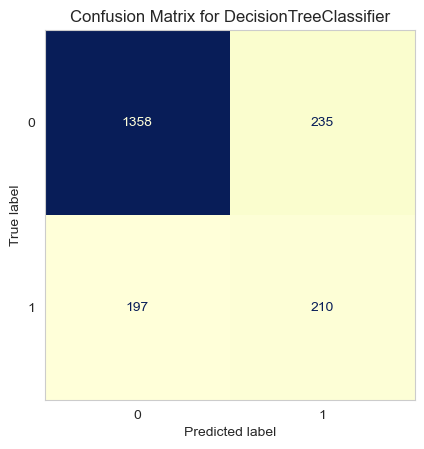

-----------------------------------------
Classifier : KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1593
           1       0.85      0.26      0.39       407

    accuracy                           0.84      2000
   macro avg       0.85      0.62      0.65      2000
weighted avg       0.84      0.84      0.80      2000



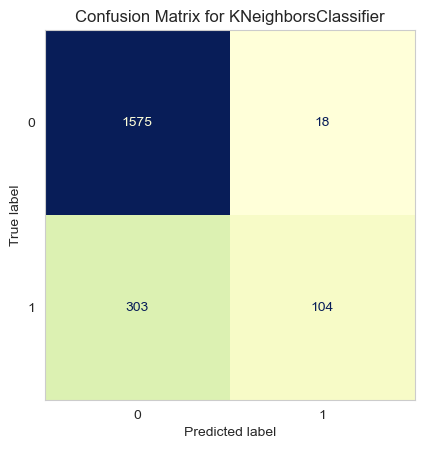

-----------------------------------------
Classifier : GaussianNB
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1593
           1       0.60      0.35      0.44       407

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.67      2000
weighted avg       0.80      0.82      0.80      2000



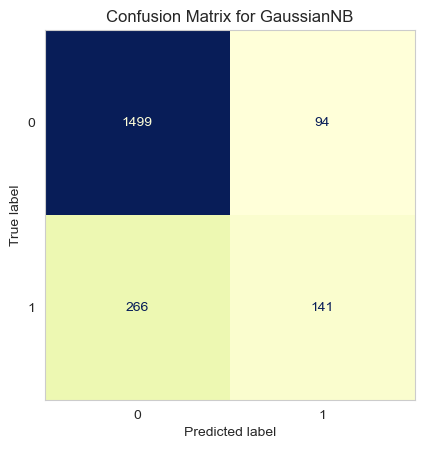

-----------------------------------------
Classifier : CatBoostClassifier
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.48      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



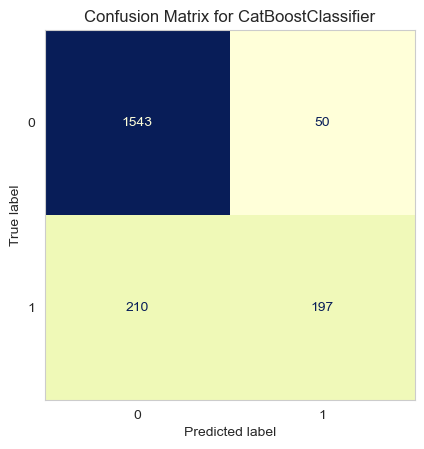

-----------------------------------------
Classifier : LGBMClassifier
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



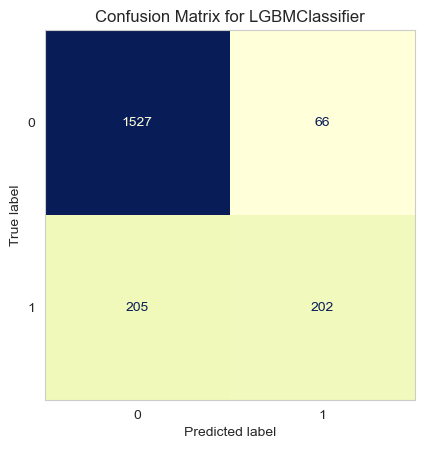

-----------------------------------------


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"Classifier : {name}")
    print(classification_report(y_test,y_pred))
    print(ConfusionMatrixDisplay.from_predictions( y_test,y_pred, cmap='YlGnBu',colorbar=False))
    plt.title(f"Confusion Matrix for {name}")
    plt.grid(False)
    plt.show()
    print('-----------------------------------------')
    


# Classification report

# ROC Curve & AUC for models

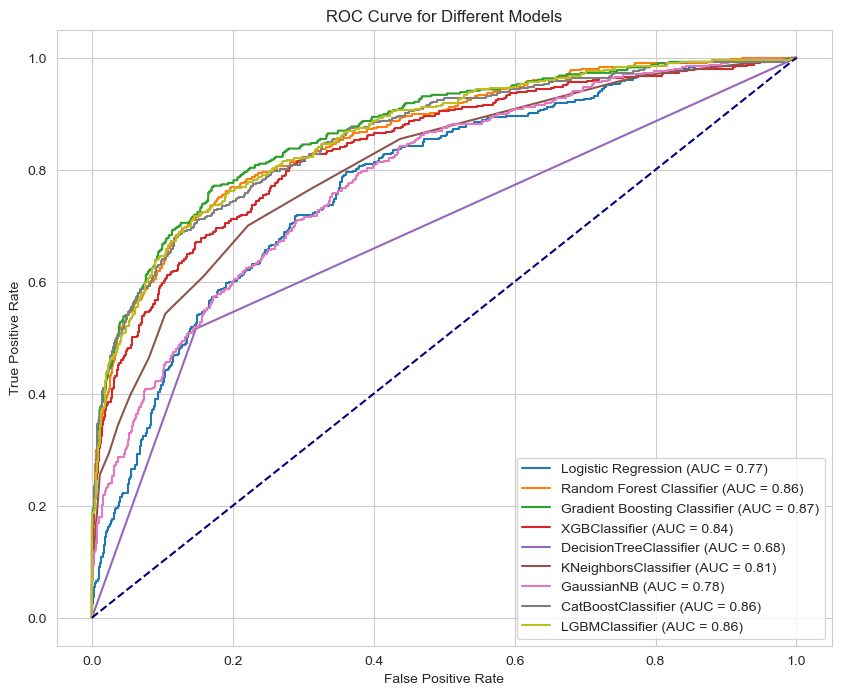

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Loop through models to calculate ROC curve and AUC, and plot them
plt.figure(figsize=(10, 8))  # Create a figure for plotting

for name, model in models.items():
    # Fit the model on training data
    model.fit(X_train_scaled, y_train)
    
    # Predict probabilities for the positive class (1)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
    else:
        # For models that don't support predict_proba, use decision_function (SVMs etc.)
        y_prob = model.decision_function(X_test_scaled)
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc="lower right")

# Show plot
plt.show()


# ROC Curve & AUC for Gradient Boosting Classifier

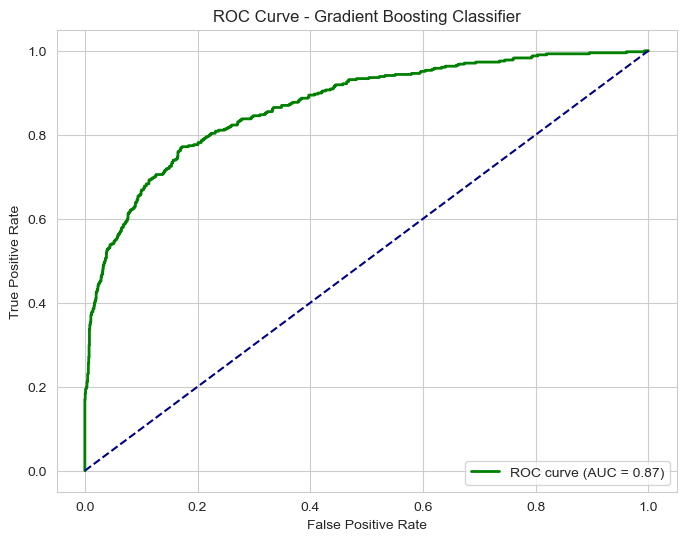

In [51]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# فرض می‌کنیم مدل 'Random Forest Classifier' را از دیکشنری انتخاب کرده‌اید
model = models['Gradient Boosting Classifier']

# Fit the model on training data
model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class (1)
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
else:
    y_prob = model.decision_function(X_test_scaled)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")

# Show plot
plt.show()


# oversampling

In [52]:
# since we have imbalance dataset, we apply SMOTE method to dataframe

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

X= df.drop('Exited',axis=1)
y=df['Exited']

X_resampled, y_resampled = smote.fit_resample(X,y)

X_train_sm,X_test_sm, y_train_sm,y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=15, stratify=y_resampled)






In [53]:
for name,model in models.items():
    model.fit(X_train_sm,y_train_sm)
    y_pred = model.predict(X_test_sm)
    accu_score = accuracy_score(y_test_sm,y_pred)
    print("{} accuracy score : {}".format(name,accu_score))

Logistic Regression accuracy score : 0.7548650345260515
Random Forest Classifier accuracy score : 0.8427495291902072
Gradient Boosting Classifier accuracy score : 0.832391713747646
XGBClassifier accuracy score : 0.8640929064657878
DecisionTreeClassifier accuracy score : 0.7947269303201506
KNeighborsClassifier accuracy score : 0.6352793471437539
GaussianNB accuracy score : 0.7313245448838669
CatBoostClassifier accuracy score : 0.8543628374136849
LGBMClassifier accuracy score : 0.8524795982423101


In [54]:
models = {'Logistic Regression':lr , 'Random Forest Classifier':rf ,  'Gradient Boosting Classifier':gbc, 'XGBClassifier':xgboost,
        'DecisionTreeClassifier':cart , 'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=18) , 'GaussianNB':gnb , 'CatBoostClassifier':catboost,
         'LGBMClassifier':lightgbm}



 
for name,model in models.items():
        kf = KFold(n_splits=6 , shuffle=True , random_state=0)
        cv_scores = cross_val_score(model , X_train_sm , y_train_sm, cv=kf , scoring='accuracy')
    
        avg_accuracy = cv_scores.mean()
        avg_precision = cross_val_score(model , X_train_sm, y_train_sm, cv=kf, scoring='precision_macro').mean()
        avg_recall = cross_val_score(model , X_train_sm , y_train_sm , cv=kf, scoring='recall_macro').mean()
    
    
        results.append(cv_scores)
        
        print(f'Classifier: {name}')
        print(f'Average Accuracy: {avg_accuracy:.4f}')
        print(f'Average Precision: {avg_precision:.4f}')
        print(f'Average Recall: {avg_recall:.4f}')
        print('-----------------------')


Classifier: Logistic Regression
Average Accuracy: 0.6875
Average Precision: 0.6875
Average Recall: 0.6875
-----------------------
Classifier: Random Forest Classifier
Average Accuracy: 0.8487
Average Precision: 0.8490
Average Recall: 0.8488
-----------------------
Classifier: Gradient Boosting Classifier
Average Accuracy: 0.8400
Average Precision: 0.8402
Average Recall: 0.8401
-----------------------
Classifier: XGBClassifier
Average Accuracy: 0.8554
Average Precision: 0.8555
Average Recall: 0.8554
-----------------------
Classifier: DecisionTreeClassifier
Average Accuracy: 0.7879
Average Precision: 0.7882
Average Recall: 0.7879
-----------------------
Classifier: KNeighborsClassifier
Average Accuracy: 0.6254
Average Precision: 0.6256
Average Recall: 0.6254
-----------------------
Classifier: GaussianNB
Average Accuracy: 0.7215
Average Precision: 0.7233
Average Recall: 0.7215
-----------------------
Classifier: CatBoostClassifier
Average Accuracy: 0.8553
Average Precision: 0.8554
Avera

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5,6],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300,500]
}

xgb = XGBClassifier(random_state=0)

grid_search = GridSearchCV(xgb, param_grid,  scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Best cross-validation score:  0.8592621664050236


In [56]:
best_model = grid_search.best_estimator_

In [57]:
best_model.score(X_test_sm,y_test_sm)

0.86691776522285

In [58]:
best_model.score(X_train_sm,y_train_sm)

0.9658555729984302

In [59]:
y_pred = best_model.predict(X_test_sm)

In [60]:
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.86      0.87      0.87      1593

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



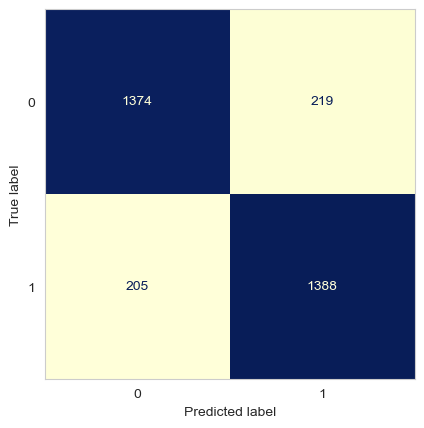

In [62]:
print(ConfusionMatrixDisplay.from_predictions( y_test_sm,y_pred, cmap='YlGnBu',colorbar=False))
plt.grid(False)
plt.show()

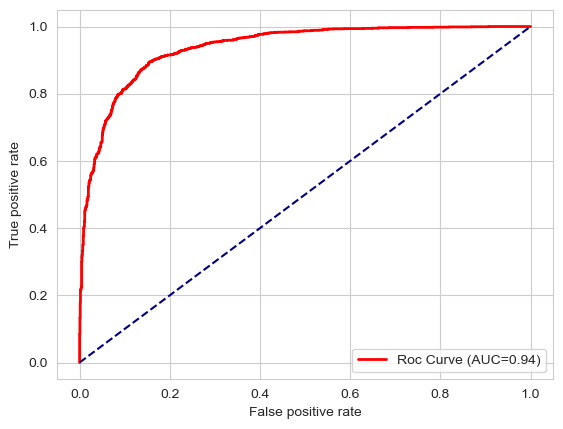

In [67]:
y_pred_prob = best_model.predict_proba(X_test_sm)[:,1]

fpr,tpr,threshold = roc_curve(y_test_sm, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, color='red', lw=2, label=f"Roc Curve (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.show()